In [ ]:
import numpy as np
import numpy as pillow

In [ ]:
nigga = np.loadtxt('FuelConsumptionCo2.csv' , skiprows = 1 , usecols = [4, 10 ,12] , delimiter="," )
nigga

array([[  2. ,   8.5, 196. ],
       [  2.4,   9.6, 221. ],
       [  1.5,   5.9, 136. ],
       ...,
       [  3. ,  11.8, 271. ],
       [  3.2,  11.3, 260. ],
       [  3.2,  12.8, 294. ]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

df = pd.read_csv('FuelConsumptionCo2.csv')

es = df['ENGINESIZE'].values
fc = df['CO2EMISSIONS'].values

es_normalized = (es - np.mean(es)) / np.std(es)
fc_normalized = (fc - np.mean(fc)) / np.std(fc)


a, b = 0, 0
lr = 0.01
n_iterations = 500
N = len(es)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(es, fc, color='blue', alpha=0.5, label='Actual Data')
ax.set_xlabel('Engine Size (L)')
ax.set_ylabel('CO2 Emissions (g/km)')
ax.set_title('Gradient Descent: Regression Line Movement')
line, = ax.plot([], [], 'r-', linewidth=2, label='Current Fit')
ax.legend()
ax.grid(True)

a_history, b_history = [], []

def init():
    line.set_data([], [])
    return line,

def update(frame):
    global a, b

    y_hat = a * es_normalized + b

    error = fc_normalized - y_hat
    gradient_a = (-2/N) * np.dot(error, es_normalized)
    gradient_b = (-2/N) * np.sum(error)

    a -= gradient_a * lr
    b -= gradient_b * lr

    a_history.append(a)
    b_history.append(b)

    x_plot = np.linspace(min(es), max(es), 100)
    x_plot_normalized = (x_plot - np.mean(es)) / np.std(es)
    y_plot_normalized = a * x_plot_normalized + b
    y_plot = y_plot_normalized * np.std(fc) + np.mean(fc)

    line.set_data(x_plot, y_plot)
    ax.set_title(f'Iteration {frame}: y = {a:.4f}x + {b:.4f} (Normalized)')

    return line,

ani = FuncAnimation(
    fig,
    update,
    frames=range(n_iterations),
    init_func=init,
    blit=True,
    interval=50,
    repeat=False
)

ani.save('gradient_descent_co2.gif', writer='pillow', fps=20)
plt.close()
print("GIF saved as 'gradient_descent_co2.gif'")

GIF saved as 'gradient_descent_co2.gif'


Final Parameters (Denormalized):
Slope (a): 39.1236
Intercept (b): 125.3095
Equation: CO2 = 39.12 * EngineSize + 125.31


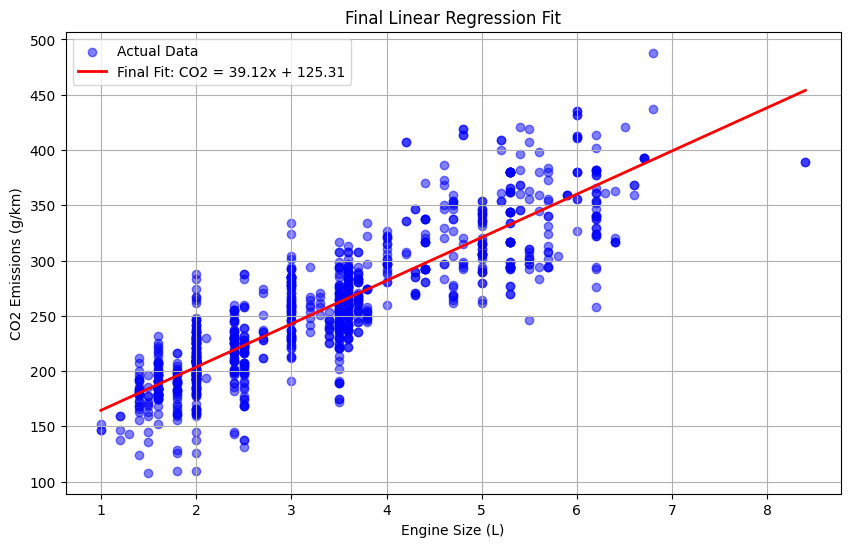

In [ ]:
a_final = a * (np.std(fc) / np.std(es))
b_final = np.mean(fc) - a_final * np.mean(es)

print(f"Final Parameters (Denormalized):")
print(f"Slope (a): {a_final:.4f}")
print(f"Intercept (b): {b_final:.4f}")
print(f"Equation: CO2 = {a_final:.2f} * EngineSize + {b_final:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(es, fc, color='blue', alpha=0.5, label='Actual Data')
x_plot = np.linspace(min(es), max(es), 100)
y_plot = a_final * x_plot + b_final
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label=f'Final Fit: CO2 = {a_final:.2f}x + {b_final:.2f}')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Final Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()